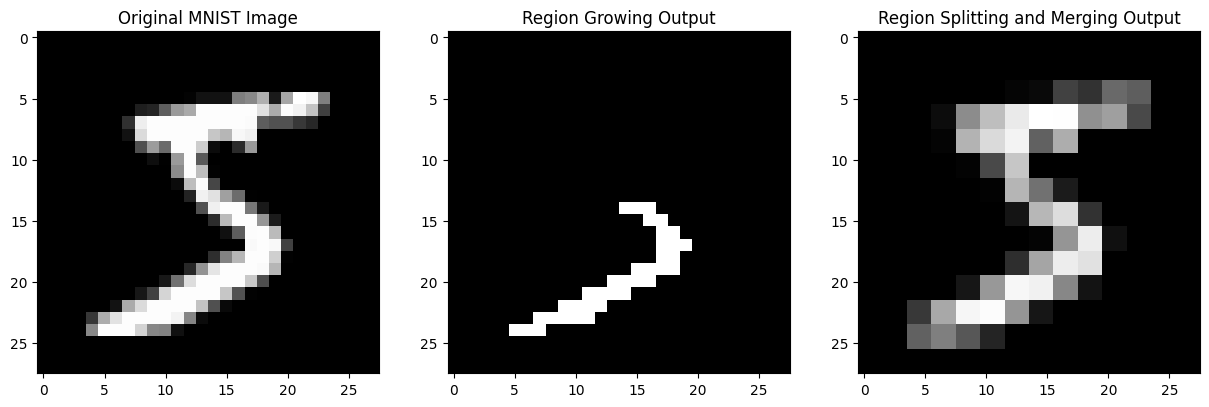

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque

train = pd.read_csv('mnist_train.csv')
image = train.iloc[0, 1:].values.reshape(28, 28).astype(np.uint8)

def region_growing(img, seed, threshold):
    output = np.zeros_like(img, dtype=np.uint8)
    x, y = seed
    mean_intensity = img[x, y].astype(np.float32)
    region_size = 1
    pixel_queue = deque([(x, y)])
    output[x, y] = 255

    while pixel_queue:
        x, y = pixel_queue.popleft()
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < img.shape[0] and 0 <= ny < img.shape[1] and output[nx, ny] == 0:
                intensity_diff = abs(int(img[nx, ny]) - mean_intensity)
                if intensity_diff < threshold:
                    output[nx, ny] = 255
                    pixel_queue.append((nx, ny))
                    mean_intensity = (mean_intensity * region_size + img[nx, ny]) / (region_size + 1)
                    region_size += 1

    return output

seed = (14, 14)
threshold = 15
region_grown_output = region_growing(image, seed, threshold)

def region_splitting_merging(img, block_size, threshold):
    rows, cols = img.shape
    output = np.zeros_like(img, dtype=np.uint8)

    for row in range(0, rows, block_size):
        for col in range(0, cols, block_size):
            block = img[row:row + block_size, col:col + block_size]
            mean_intensity = np.mean(block)
            if np.max(block) - np.min(block) < threshold:
                output[row:row + block_size, col:col + block_size] = mean_intensity
            elif block.shape[0] > 1 and block.shape[1] > 1:
                sub_block_size = block_size // 2
                output[row:row + sub_block_size, col:col + sub_block_size] = np.mean(block[:sub_block_size, :sub_block_size])
                output[row:row + sub_block_size, col + sub_block_size:col + block_size] = np.mean(block[:sub_block_size, sub_block_size:])
                output[row + sub_block_size:row + block_size, col:col + sub_block_size] = np.mean(block[sub_block_size:, :sub_block_size])
                output[row + sub_block_size:row + block_size, col + sub_block_size:col + block_size] = np.mean(block[sub_block_size:, sub_block_size:])

    return output

block_size = 4
threshold = 10
split_merge_output = region_splitting_merging(image, block_size, threshold)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original MNIST Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Region Growing Output")
plt.imshow(region_grown_output, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Region Splitting and Merging Output")
plt.imshow(split_merge_output, cmap='gray')
plt.show()


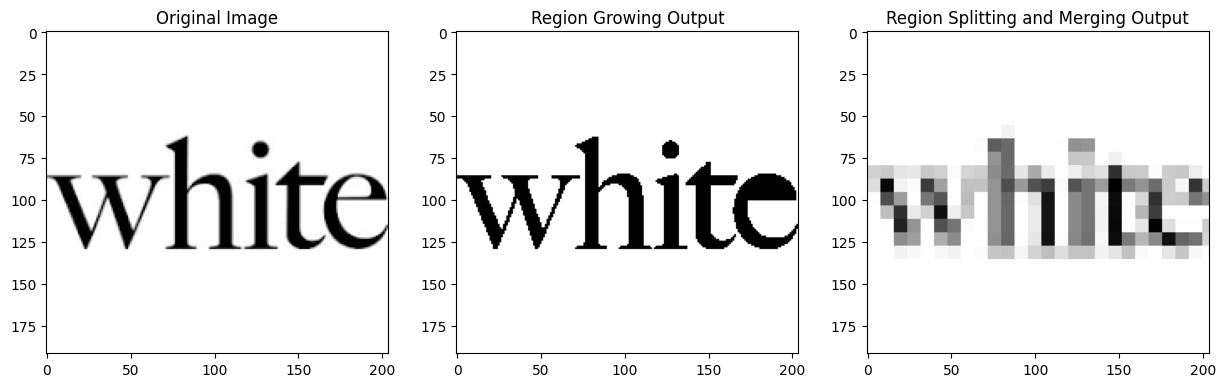

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import deque

image_path = '2.png'
image = np.array(Image.open(image_path).convert('L')).astype(np.uint8)

def region_growing(img, seed, threshold):
    output = np.zeros_like(img, dtype=np.uint8)
    x, y = seed
    mean_intensity = img[x, y].astype(np.float32)
    region_size = 1
    pixel_queue = deque([(x, y)])
    output[x, y] = 255

    while pixel_queue:
        x, y = pixel_queue.popleft()
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < img.shape[0] and 0 <= ny < img.shape[1] and output[nx, ny] == 0:
                intensity_diff = abs(int(img[nx, ny]) - mean_intensity)
                if intensity_diff < threshold:
                    output[nx, ny] = 255
                    pixel_queue.append((nx, ny))
                    mean_intensity = (mean_intensity * region_size + img[nx, ny]) / (region_size + 1)
                    region_size += 1

    return output

seed = (50, 50)
threshold = 50
region_grown_output = region_growing(image, seed, threshold)

def region_splitting_merging(img, block_size, threshold):
    rows, cols = img.shape
    output = np.zeros_like(img, dtype=np.uint8)

    for row in range(0, rows, block_size):
        for col in range(0, cols, block_size):
            block = img[row:row + block_size, col:col + block_size]
            mean_intensity = np.mean(block)
            if np.max(block) - np.min(block) < threshold:
                output[row:row + block_size, col:col + block_size] = mean_intensity
            elif block.shape[0] > 1 and block.shape[1] > 1:
                sub_block_size = block_size // 2
                output[row:row + sub_block_size, col:col + sub_block_size] = np.mean(block[:sub_block_size, :sub_block_size])
                output[row:row + sub_block_size, col + sub_block_size:col + block_size] = np.mean(block[:sub_block_size, sub_block_size:])
                output[row + sub_block_size:row + block_size, col:col + sub_block_size] = np.mean(block[sub_block_size:, :sub_block_size])
                output[row + sub_block_size:row + block_size, col + sub_block_size:col + block_size] = np.mean(block[sub_block_size:, sub_block_size:])

    return output

block_size = 16
threshold = 30
split_merge_output = region_splitting_merging(image, block_size, threshold)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Region Growing Output")
plt.imshow(region_grown_output, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Region Splitting and Merging Output")
plt.imshow(split_merge_output, cmap='gray')
plt.show()
